<a href="https://colab.research.google.com/github/StephenJohnson-CardiffUni/Astro/blob/main/PlankFitForWeBo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade uncertainties

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 5.0 MB/s eta 0:00:00


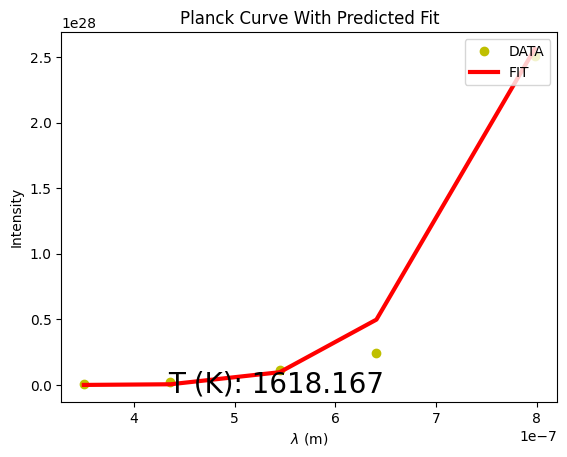

The best fit temperature in Kelvins is: 1618.167


In [11]:
import uncertainties as uc
from blackbody_curve import blackbody_fit
import numpy as np

wavelengths = np.array([3500,4361,5446,6407,7980])/10                     #in nm
# aparentMagnitudes = np.array([17.273,16.2852,14.5886,13.6869,11.2188])    #My measurements
aparentMagnitudes = np.array([uc.ufloat(17.273,0.02933),uc.ufloat(16.2852,0.00614),uc.ufloat(14.5648,0.00233),uc.ufloat(13.7033,0.00141),uc.ufloat(11.1838,0.00147)])
aparentMagnitudes2 = np.array([17.41803,16.2912,14.4998,13.6813,11.1713]) #Jacks 2nd measurements


'''magnitude to intensity
M = m-5(log10(d)-1) # aparent to abs
M = -2.5Log10 (L/3.0128x10^28) #mag from lum compared to vega
'''
distance = 1573.81                                          #from gaia paralax

absolutMagnitudes = aparentMagnitudes - 5*(np.log10(distance)-1)

intensitys = 3.0128 * 10**(-(0.4*absolutMagnitudes)+28)     

blackbody_fit(wavelengths, list(x.n for x in intensitys))



In [12]:
import scipy.constants as cons

peak = cons.Wien/1618.167

print(peak)
#1791nm Short IR

1.790774348383078e-06


This is code for a failed idea, take ellipse shaped mag readings of increaing size and plot mag vs distance.. this was not a good idea

In [3]:
##This is with elipse

Intensity=np.array([739.2405,743.4583,774.0023,795.5955,830.1824,911.6323,1055.54,1330.353,2317.993])
areaInPix=np.array([63575   ,52381   ,34535   ,27558   ,20639   ,12878   ,7428   ,4018    ,1322])

import matplotlib.pyplot as plt

plt.plot(areaInPix,Intensity)

NameError: ignored

This section of code is used to calculate an intenity vs distance from central star graph.

We start from x/y for start and end point of line
convert that to euclidian dustance and that to angular distance
conversion for angular distance is 0.389 arcsec/pixel



In [ ]:
##
def distanceFromCartezean(x1,y1,x2,y2):
  xDist = x2-x1
  yDist = y2-y1
  return ((xDist**2)+(yDist**2))**0.5

In [ ]:
distanceFromCartezean(7,7,8,8)

1.4142135623730951

In [ ]:
x1s = np.array([1973  ,1973  ,1973  ,1973  ,1973  ,1973.5,1973.5,1973.5,1973.5,1973.5,1973.5])
y1s = np.array([2052.5,2052.5,2052.5,2052.5,2052.5,2053  ,2053  ,2053  ,2053  ,2053  ,2053])
x2s = np.array([1982  ,1982  ,1982  ,1982  ,1982  ,1982.5,1983  ,1983  ,1983  ,1983  ,1983])
y2s = np.array([1947  ,1951.5,1955  ,1959  ,1962.5,1966  ,1969  ,1972  ,1975  ,1978  ,1981])

In [ ]:
distances = distanceFromCartezean(x1s,y1s,x2s,y2s)

In [ ]:
print(distances)

[105.88319036 101.40019724  97.91450352  93.93215637  90.44888059
  87.46427842  84.5354955   81.55519603  78.57639595  75.59927248
  72.62403184]


In [ ]:
intensitys = np.array([
    uc.ufloat(2375.918,6363.332),
    uc.ufloat(2315.134,6256.829),
    uc.ufloat(2203.895,6078.933),
    uc.ufloat(2154.259,5982.884),
    uc.ufloat(2104.96,5891.884),
    uc.ufloat(2077.151,5832.685),
    uc.ufloat(2346.119,6767.534),
    uc.ufloat(2282.523,6642.517),
    uc.ufloat(2224.345,6523.952),
    uc.ufloat(2184.483,6438.865),
    uc.ufloat(2120.337,6304.636)
    ])

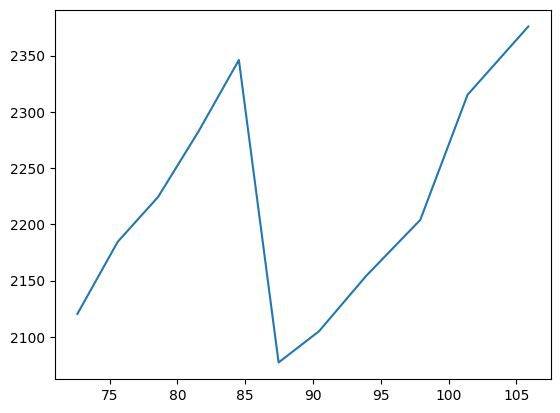

In [ ]:
#expression for item in iterable if condition == True

plt.plot(distances,list(x.n for x in intensitys))

This for curve fit to jacks mag vs distance

In [ ]:
import scipy

def func(x, a, b, Offset): # Sigmoid A with Offset from zunzun.com
    return 1.0 / (1.0 + np.exp(-1.0 * a * (x - b))) + Offset




In [ ]:
#data
